<a href="https://colab.research.google.com/github/maxim920/Machine-Learning/blob/main/Kosenko_lab6_1_4_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
# 1. Завантаження та підготовка даних
housing = fetch_california_housing()
X, y = housing.data, housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
# 2. Побудова базової регресійної моделі
base_model = LinearRegression()
base_model.fit(X_train_scaled, y_train)

# Оцінка базової моделі
y_pred_base = base_model.predict(X_test_scaled)
mse_base = mean_squared_error(y_test, y_pred_base)
r2_base = r2_score(y_test, y_pred_base)

print("Базова модель:")
print(f"MSE: {mse_base:.4f}")
print(f"R^2: {r2_base:.4f}")

Базова модель:
MSE: 0.5559
R^2: 0.5758


In [4]:
# 3. Аналіз перенавчання
y_pred_train_base = base_model.predict(X_train_scaled)
mse_train_base = mean_squared_error(y_train, y_pred_train_base)
r2_train_base = r2_score(y_train, y_pred_train_base)

print("\nПеревірка перенавчання:")
print(f"MSE (тренувальні дані): {mse_train_base:.4f}")
print(f"R^2 (тренувальні дані): {r2_train_base:.4f}")
print(f"MSE (тестові дані): {mse_base:.4f}")
print(f"R^2 (тестові дані): {r2_base:.4f}")


Перевірка перенавчання:
MSE (тренувальні дані): 0.5179
R^2 (тренувальні дані): 0.6126
MSE (тестові дані): 0.5559
R^2 (тестові дані): 0.5758


In [5]:
# 4. Запобігання перенавчанню
alphas = np.logspace(-4, 4, 100)

# Ridge регресія
ridge_scores = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge_score = cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    ridge_scores.append(np.mean(ridge_score))

best_alpha_ridge = alphas[np.argmax(ridge_scores)]
print(f"\nНайкращий альфа для Ridge: {best_alpha_ridge:.4f}")

ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(X_train_scaled, y_train)

# Lasso регресія
lasso_scores = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso_score = cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    lasso_scores.append(np.mean(lasso_score))

best_alpha_lasso = alphas[np.argmax(lasso_scores)]
print(f"Найкращий альфа для Lasso: {best_alpha_lasso:.4f}")

lasso_model = Lasso(alpha=best_alpha_lasso)
lasso_model.fit(X_train_scaled, y_train)


Найкращий альфа для Ridge: 0.1177
Найкращий альфа для Lasso: 0.0006


Lasso(alpha=0.0006428073117284319)

In [6]:
# 5. Оцінка результатів
y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

y_pred_lasso = lasso_model.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nРезультати:")
print("Ridge регресія:")
print(f"MSE: {mse_ridge:.4f}")
print(f"R^2: {r2_ridge:.4f}")
print("\nLasso регресія:")
print(f"MSE: {mse_lasso:.4f}")
print(f"R^2: {r2_lasso:.4f}")


Результати:
Ridge регресія:
MSE: 0.5559
R^2: 0.5758

Lasso регресія:
MSE: 0.5550
R^2: 0.5765


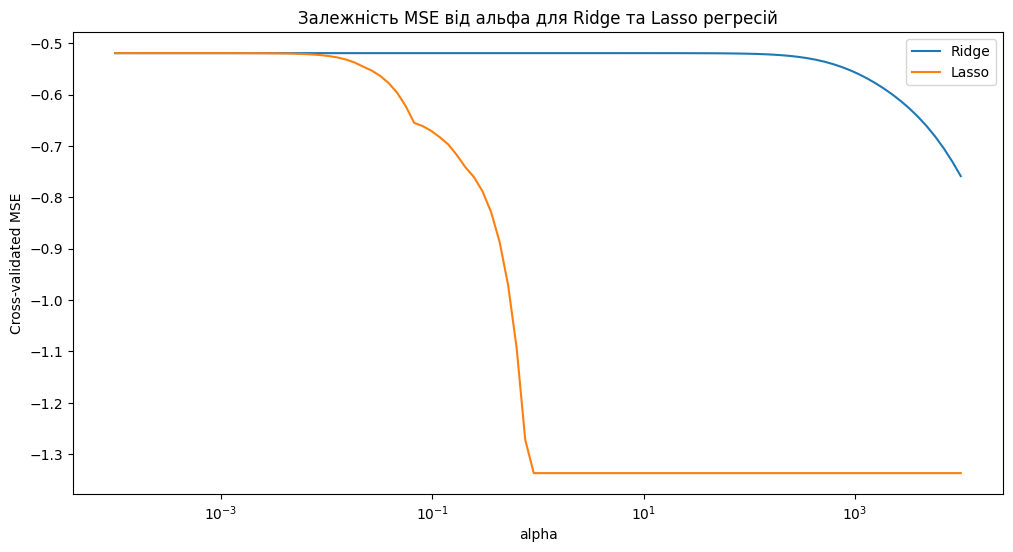

In [7]:
# 6. Візуалізація
plt.figure(figsize=(12, 6))
plt.semilogx(alphas, ridge_scores, label='Ridge')
plt.semilogx(alphas, lasso_scores, label='Lasso')
plt.xlabel('alpha')
plt.ylabel('Cross-validated MSE')
plt.title('Залежність MSE від альфа для Ridge та Lasso регресій')
plt.legend()
plt.show()

У процесі виконання лабораторної роботи була побудована базова лінійна регресійна модель. На основі тренувальних даних її результати склали MSE = 0.5179 і R² = 0.6126, а на тестових — MSE = 0.5559 і R² = 0.5758. Різниця в точності між тренувальними та тестовими даними є невеликою, що свідчить про відсутність явного перенавчання, хоча існує можливість покращення результатів за допомогою регуляризації. Для запобігання перенавчанню були застосовані моделі Ridge і Lasso регресії. Під час підбору параметра регуляризації alpha оптимальними значеннями стали 0.1177 для Ridge і 0.0006 для Lasso. Це дозволило краще контролювати складність моделі та знизити ризик перенавчання. Оцінка продуктивності моделей показала, що Ridge регресія дала такі ж результати, як і базова модель, тоді як Lasso регресія продемонструвала трохи кращі показники: MSE = 0.5550 і R² = 0.5765. Регуляризація, особливо у випадку Lasso, дозволила досягти незначного покращення продуктивності порівняно з базовою моделлю. На графіку видно, що при малих значеннях alpha помилка мінімальна, але зі зростанням alpha, особливо для Lasso, помилка значно збільшується. Це підтверджує важливість точного підбору цього параметра. Використання крос-валідації забезпечило більш стабільну оцінку продуктивності моделей і допомогло уникнути випадкових коливань при розділенні даних на тренувальні та тестові вибірки. Загалом, регуляризація є ефективним інструментом для запобігання перенавчанню та покращення якості моделі, а Lasso регресія з оптимальним alpha показала трохи кращі результати, ніж Ridge регресія.